In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

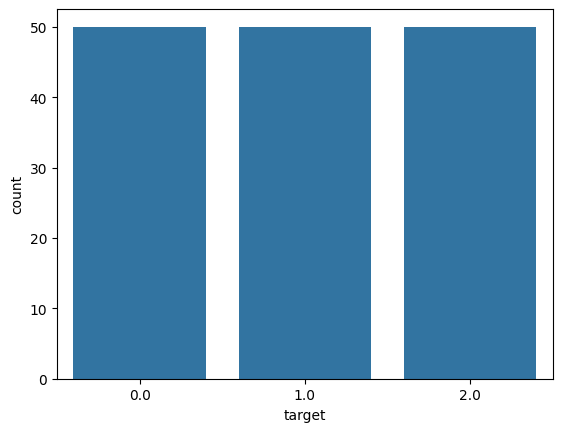

In [2]:
# Carregar a base de dados Iris fornecidos diretamente pela biblioteca sklearn.
iris = load_iris()
X = iris.data
y = iris.target

# Converter para DataFrame para facilitar a visualização
df = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['target'])

# Exibir as primeiras linhas
print(df.head())

# Descrição dos dados
print(df.describe())

# Verificação das das classes distribuidas
sns.countplot(x='target', data=df)
plt.show()


In [3]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
# Treinar o modelo de classificação Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [5]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

# Relatório de classificação
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Acurácia: 1.00
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



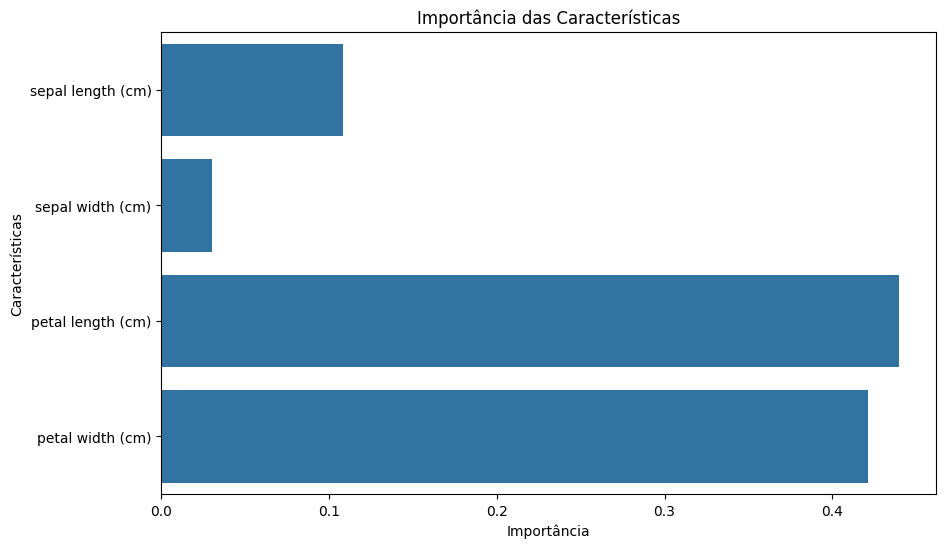

In [6]:
# Importância das características
feature_importances = model.feature_importances_
features = iris.feature_names

# Visualizar a importância das características
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.xlabel('Importância')
plt.ylabel('Características')
plt.title('Importância das Características')
plt.show()
